In [1]:
#Upload VLE dataset
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'OUData/studentVle.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


In [2]:
print(df.dtypes)

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object


In [3]:
df.shape #there are 10655280 rows


(10655280, 6)

In [4]:
#Let's aggregate the sum_click to get total daily clicks and also ignore different types of sites
# List of columns to group by. This should include all columns except 'sum_click' and 'id_site'
columns_to_group_by = ['code_module', 'code_presentation', 'id_student','date'] 

# Group by the specified columns and sum the 'sum_click' for each group
df_grouped = df.groupby(columns_to_group_by).agg(total_daily_clicks=('sum_click', 'sum')).reset_index()
df_grouped.head(100)

,code_module,code_presentation,id_student,date,total_daily_clicks
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3
...,...,...,...,...,...
95,AAA,2013J,28400,150,3
96,AAA,2013J,28400,154,27
97,AAA,2013J,28400,155,1
98,AAA,2013J,28400,156,25


In [5]:
import numpy as np
#create function that returns df with all dates included and 0 for total_daily_clicks for missing dates
def complete_df(code_module,code_presentation,id_student):
    #filter by course, presentation, and student
    filtered_df = df_grouped[(df_grouped['code_module']==code_module) & (df_grouped['code_presentation']==code_presentation) & (df_grouped['id_student']==id_student)]

    #For missing dates, we will make total_daily_clicks to be 0
  
    # Step 1: Find min and max date values
    min_day = filtered_df['date'].min()
    max_day = filtered_df['date'].max()

    # Step 2: Generate complete range of days
    all_days = np.arange(min_day, max_day + 1)  # +1 to include the last day

    # Step 3: Create a DataFrame with all days
    df_all_days = pd.DataFrame({'date': all_days, 'code_module': code_module, 'code_presentation': code_presentation, 'id_student': id_student})
    df_all_days = df_all_days.assign(total_daily_clicks=0)

    # Merge to update total_daily_clicks where data exists
    df_complete = pd.merge(df_all_days, filtered_df[['date', 'total_daily_clicks']], on='date', how='left', suffixes=('', '_update'))
    df_complete['total_daily_clicks'] = df_complete['total_daily_clicks_update'].fillna(df_complete['total_daily_clicks'])
    df_complete.drop(columns='total_daily_clicks_update', inplace=True)

    return df_complete


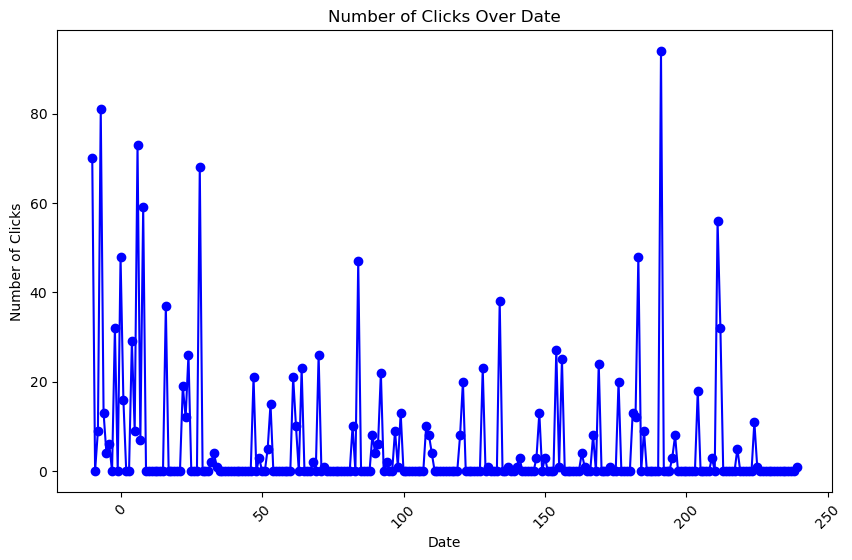

In [6]:
import matplotlib.pyplot as plt

#Plot total_daily_clicks over time for passing student
df_complete = complete_df('AAA','2013J',28400)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

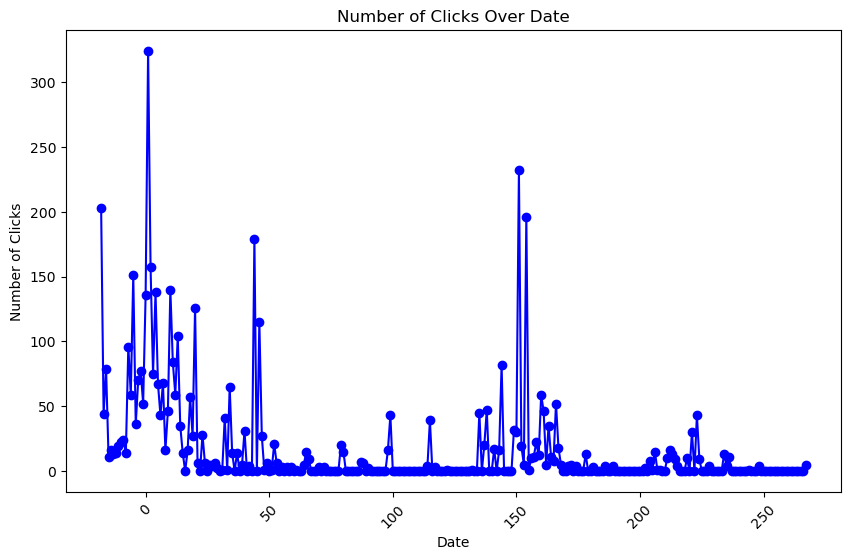

In [7]:
import matplotlib.pyplot as plt

#Plot total_daily_clicks over time for passing student
df_complete = complete_df('FFF','2014J',584515)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

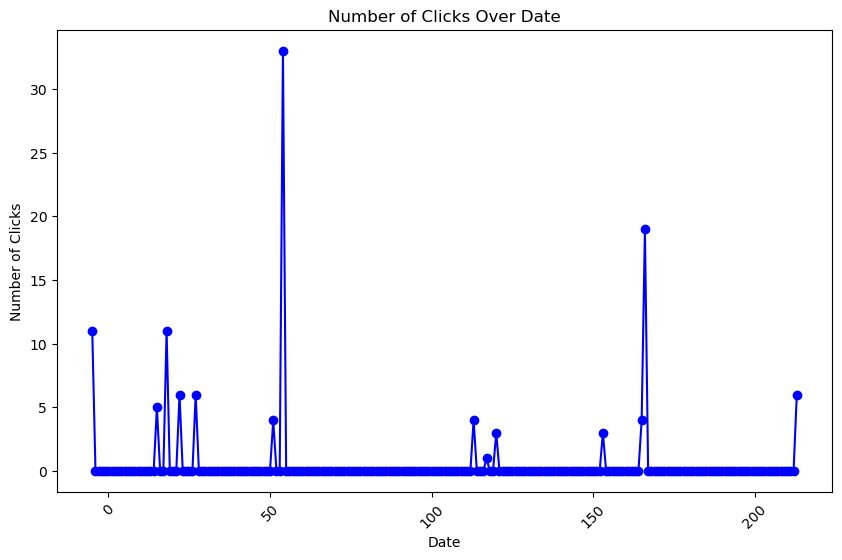

In [8]:
#Plot total_daily_clicks over time for failing student
df_complete = complete_df('AAA','2013J',74372)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

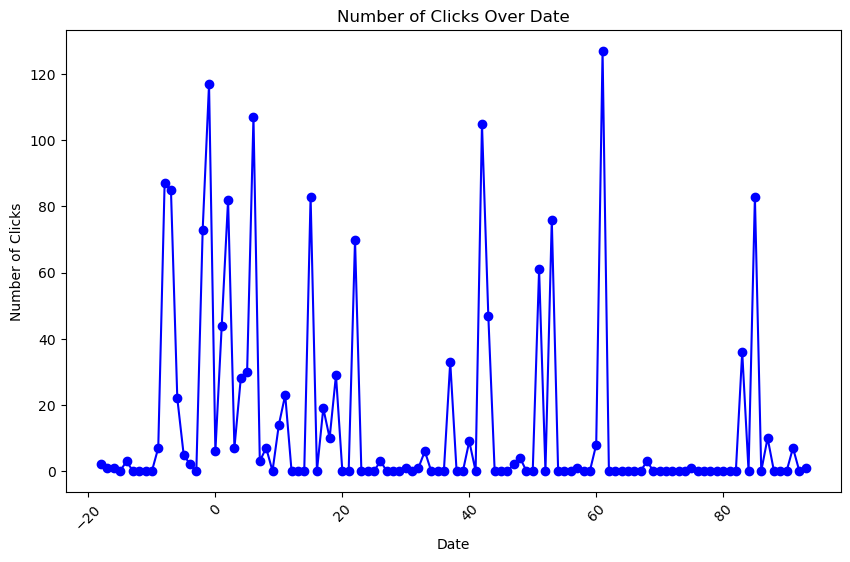

In [9]:
#Plot total_daily_clicks over time for failing student
df_complete = complete_df('FFF','2014J',584673)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

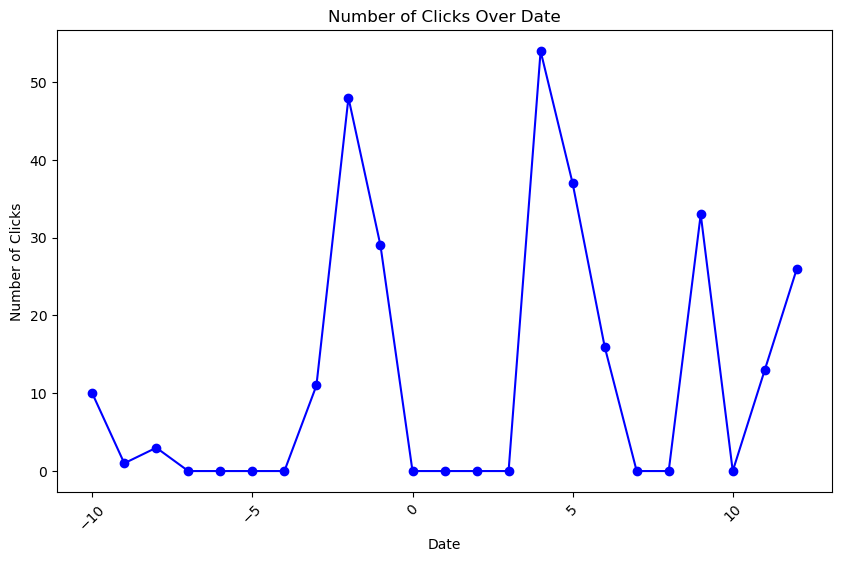

In [10]:
#Plot total_daily_clicks over time for withdrawn student
df_complete = complete_df('AAA','2013J',30268)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

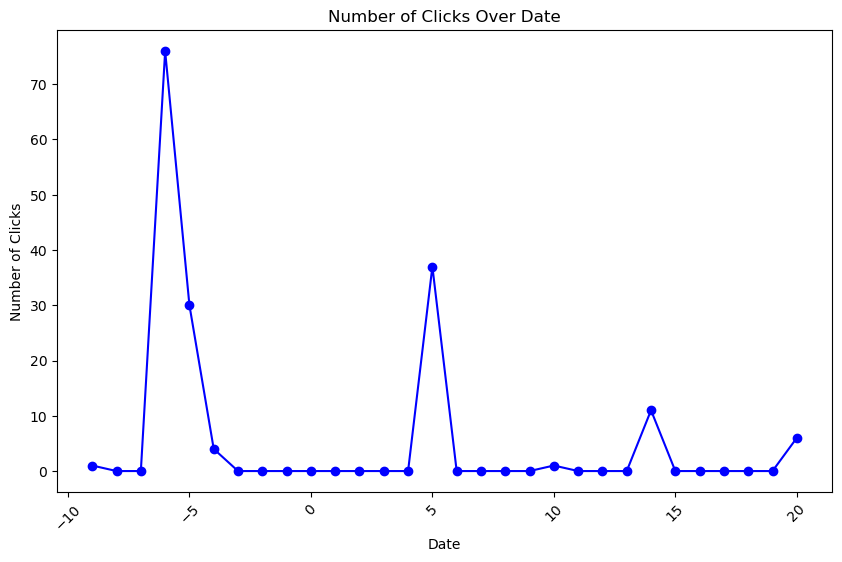

In [11]:
#Plot total_daily_clicks over time for withdrawn student
df_complete = complete_df('FFF','2014J',584594)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

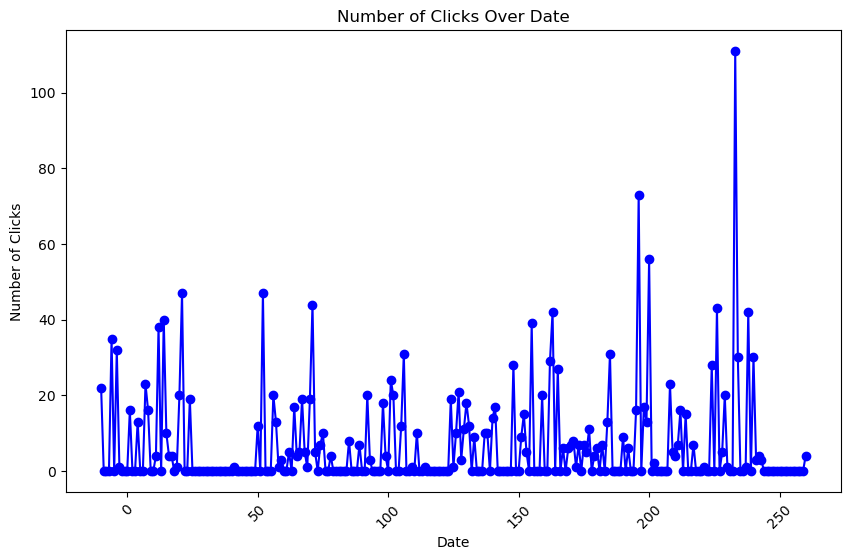

In [12]:
#Plot total_daily_clicks over time for fail student that shows lots of activity
df_complete = complete_df('AAA','2013J',241729)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

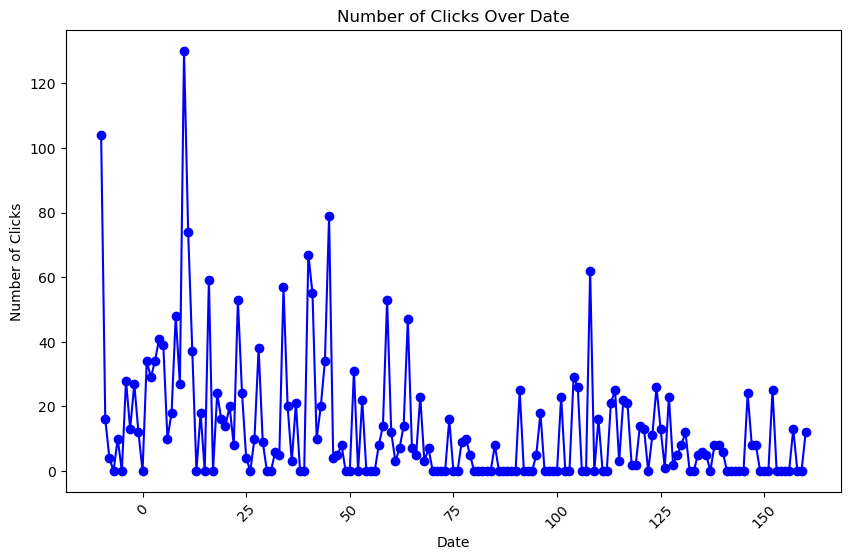

In [13]:
#Plot total_daily_clicks over time for withdrawn student that persists for a long time
df_complete = complete_df('AAA','2013J',335764)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()

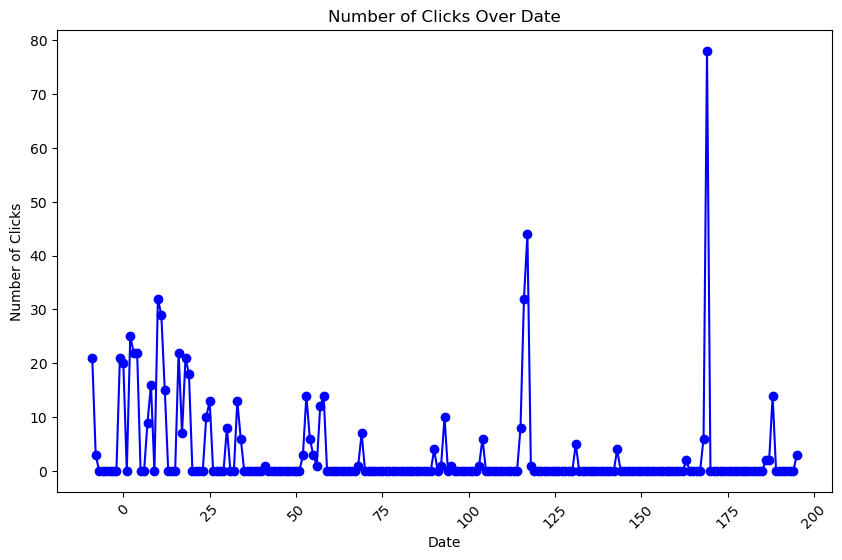

In [16]:
#Plot total_daily_clicks over time for another withdrawn student that persists for a long time
df_complete = complete_df('AAA','2013J',390890)
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.plot(df_complete['date'], df_complete['total_daily_clicks'], marker='o',linestyle='-',color='b')  # marker and color are optional

plt.title('Number of Clicks Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.show()